## Correlation (in general)
Correlation measures how two variables are related. It answers the question: "If I know something about variable X, does that give me information about variable Y"

Correlation values are normally between +1 and -1 where:
- +1: Perfect positive relationship (X increases, Y increases in the exact proportion)
- -1: Perfect negative relationship (X increases, Y decreases in the exact proportion)
- 0: No relationship between X and Y

There are various types of correlation: Pearson correlation, Spearman correlation, Kendall’s Tau correlation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#### Pearson correlation
Measures the linear relationship between two continuous variables. It looks at how close the data points are to a straight line.
It assumes:
- Variables are numerical
- The relationship is linear
- Data is roughly normally distributed

A good example of where Pearson correlation can be applied is the relationship between height and weight, study time and exam scores.

In [ ]:
N = 100
height = np.random.uniform(150, 200, N) # in cm
epsillon = 2 * np.random.randn(N)
weight = 0.5 * height + epsillon# in kg

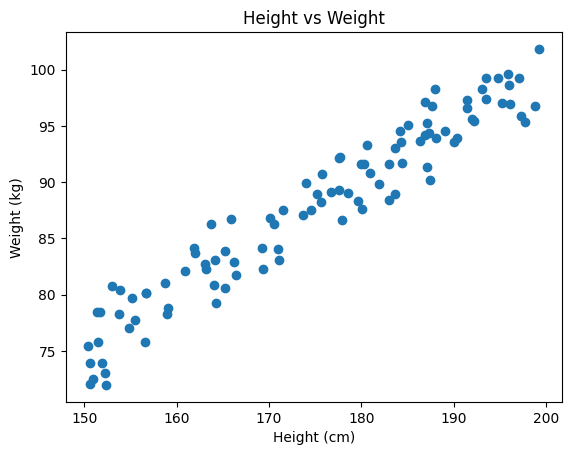

In [13]:
plt.title("Height vs Weight")
plt.scatter(height, weight)
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.show()

In [24]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
height_scaled = scaler.fit_transform(height.reshape(-1, 1))
height[:4], height_scaled[:4]

(array([180.65094597, 186.84586139, 156.68173512, 151.36524364]),
 array([[ 0.39500597],
        [ 0.81449755],
        [-1.22808031],
        [-1.58808901]]))

In [25]:
# Train the model
regressor = LinearRegression()
regressor.fit(height_scaled, weight)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
y_pred = regressor.predict(height_scaled)

#### $R^2 Score$
$R^2$ tells us how well your regression model explains the variation in the data. It answers the question how much better is my model compared to just guessing the average every time.
- **$R^2$ = 1**: Perfect prediction (the model explains all variation in the field)
- **$R^2$ = 0**: The model is no better than just using the mean as the predicted value every time.
- **$R^2$ < 0**: The model is worse than using the mean as the predicted value every time.

$\displaystyle R^2 = 1 - \frac{MSE(\hat{y}, \; y)}{MSE(\bar{y}, \; y)}$

Where: 
- $MSE$: Mean Squared Error
- $\hat{y}$: predicted values
- $y$: true values
- $\bar{y}$: mean of the true values, i.e, `np.mean(y)`

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def compute_metrics(y_pred, y):
    return {
        "MAE": mean_absolute_error(y_pred, y),
        "MSE": mean_squared_error(y_pred, y),
        "RMSE": np.sqrt(mean_squared_error(y_pred, y)),
        "R2": r2_score(y_pred, y)
    }

In [44]:
r2_score(y_pred, weight)

0.9212239030514678

In [45]:
avg_weight = np.mean(weight)
1 - mean_squared_error(y_pred, weight) / mean_squared_error(np.repeat(avg_weight, N), weight)

0.9269764159853363

In [46]:
compute_metrics(y_pred, weight)

{'MAE': 1.720277208048597,
 'MSE': 4.31183888704458,
 'RMSE': np.float64(2.076496782334271),
 'R2': 0.9212239030514678}

In [48]:
w = regressor.coef_[0]
b = regressor.intercept_
w, b

(np.float64(7.3983356866184335), np.float64(87.77273163270561))

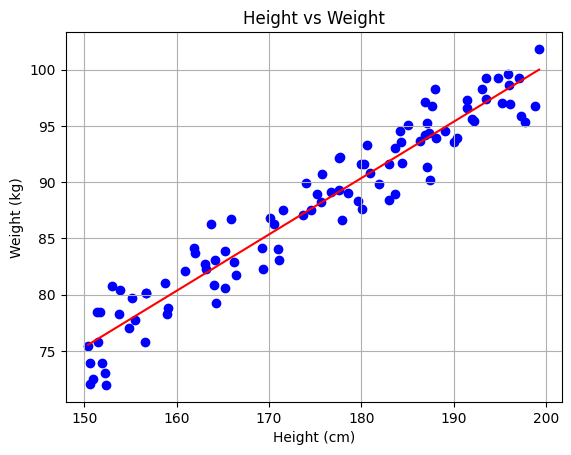

In [56]:
plt.title("Height vs Weight")
plt.scatter(height, weight, color='blue')
# Plot line using original height values
line_x = np.linspace(height.min(), height.max(), N)
line_x_scaled = scaler.transform(line_x.reshape(-1, 1)).flatten()
line_y = w * line_x_scaled + b
plt.plot(line_x, line_y, color='red')
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.grid()
plt.show()